In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Customer Churn.xls.csv')
df 
df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#replacing blanks with 0 as tenure is 0 and no total charges are recorded 

In [6]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
df.isnull().sum()
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#converted 0 and 1 value of senior citizen  to yes / no to make it easier to understand 

In [23]:
df["customerID"].duplicated().sum()
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "No"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)
df.head(21)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


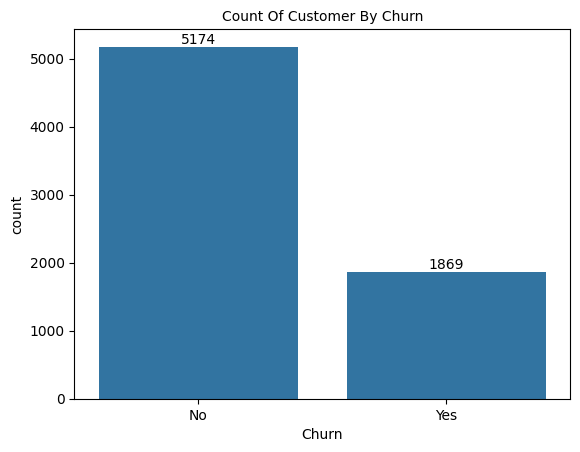

In [40]:
ax= sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customer By Churn",fontsize = 10)
plt.show()

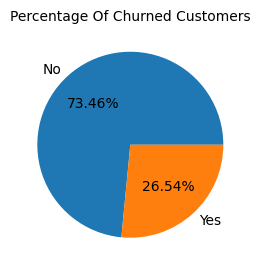

In [39]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index, autopct="%1.2f%%")
plt.title("Percentage Of Churned Customers",fontsize = 10)
plt.show()

#from given pie chart we can conclude that 26.54 % of our customer have churned out.# Now lets explore the reason behind it.


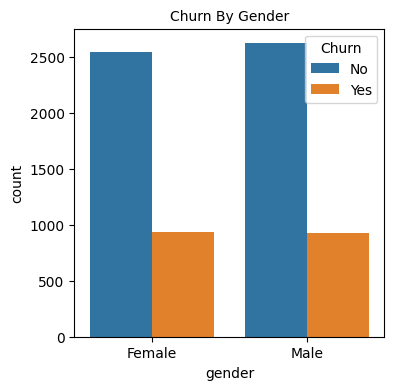

In [45]:
plt.figure(figsize=(4,4))
sns.countplot(x = "gender", data = df ,hue = 'Churn')
plt.title("Churn By Gender",fontsize = 10)
plt.show()

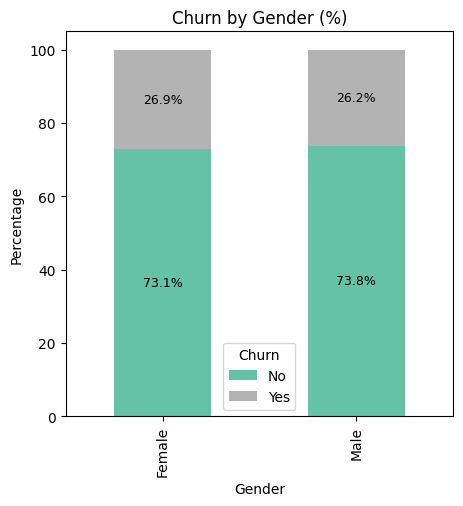

In [47]:
# Create crosstab (counts of churn by gender)
ct = pd.crosstab(df['gender'], df['Churn'])

# Convert to percentage
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar
ax = ct_pct.plot(kind='bar', stacked=True, figsize=(5,5), colormap="Set2")

# Add labels on each section
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # only label non-zero
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1f}%',
                ha='center', va='center', fontsize=9, color="black")

plt.title("Churn by Gender (%)", fontsize=12)
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.show()

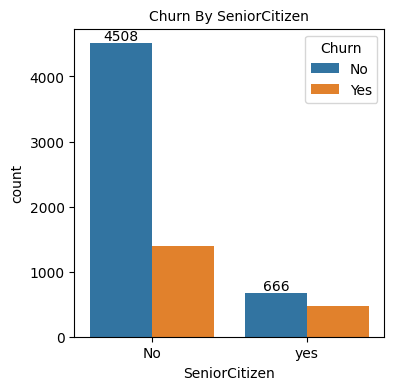

In [57]:
plt.figure(figsize=(4,4))
ax =sns.countplot(x = "SeniorCitizen", data = df ,hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Churn By SeniorCitizen",fontsize = 10)
plt.show()

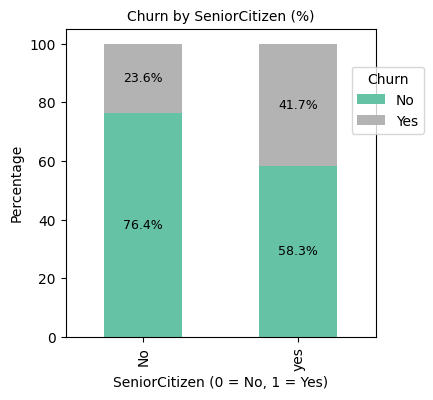

In [60]:

# Crosstab (counts of churn by SeniorCitizen)
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Convert counts to percentage
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = ct_pct.plot(kind='bar', stacked=True, figsize=(4,4,), colormap="Set2")

# Add % labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # show label only for non-zero
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1f}%',
                ha='center', va='center', fontsize=9, color="black")

# Chart formatting
plt.title("Churn by SeniorCitizen (%)", fontsize=10)
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)", fontsize=10)
plt.ylabel("Percentage", fontsize=10)
plt.legend(title="Churn", bbox_to_anchor =(0.9,0.9))
plt.show()

#comparatively a greater percentage of people in Senior Citizen catery have 

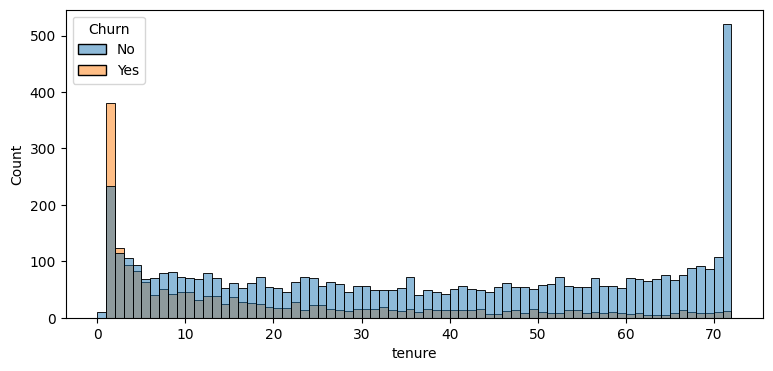

In [65]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data = df, bins =72, hue ='Churn')
plt.show()

#people who have used services for a long time have stayed and people who have used our services
#1 or 2 months have churned

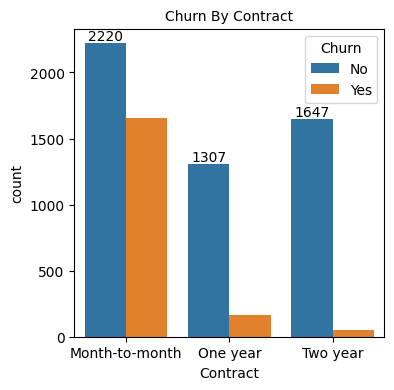

In [67]:
plt.figure(figsize=(4,4))
ax =sns.countplot(x = "Contract", data = df ,hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Churn By Contract",fontsize = 10)
plt.show()

#people who have month to month contract are likely to churned from those who have one to two year contract

In [69]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

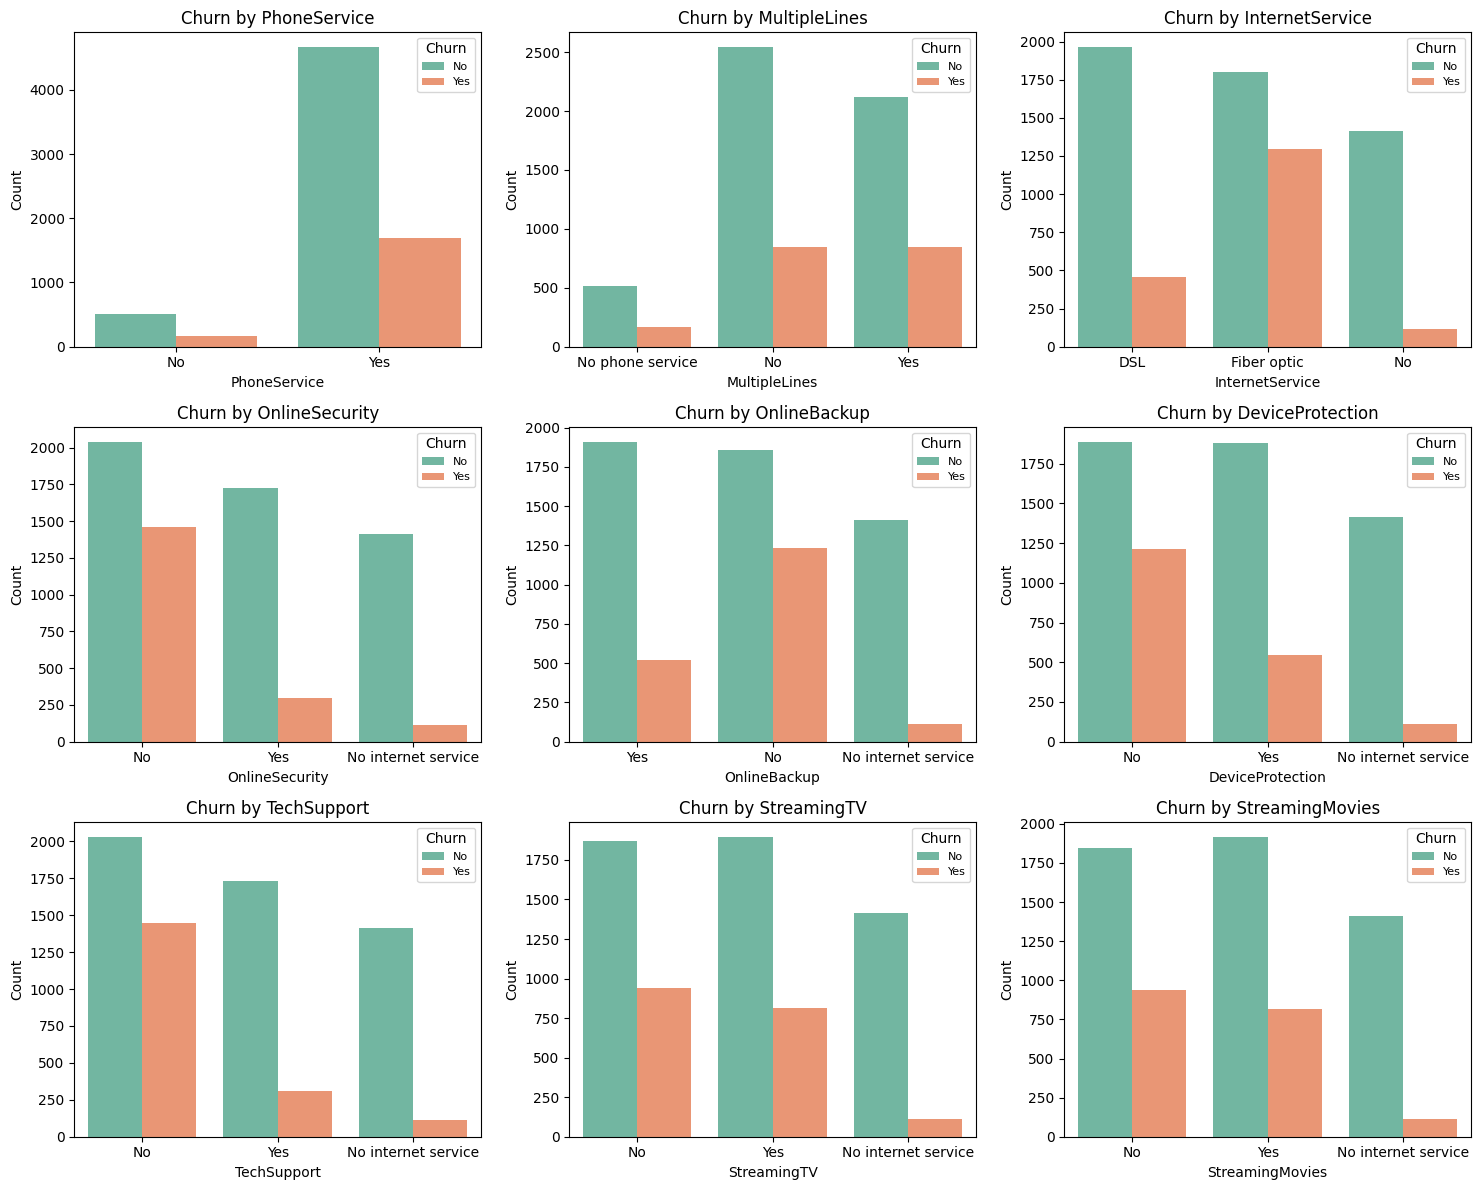

In [75]:
# Columns to plot
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up subplot grid (3 rows × 3 cols since you have 9 features)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Loop through each column and create countplot
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, hue='Churn', ax=axes[i], palette="Set2")
    axes[i].set_title(f"Churn by {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].legend(title="Churn", fontsize=8)

# Remove any empty subplots if cols < grid size
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#summary 

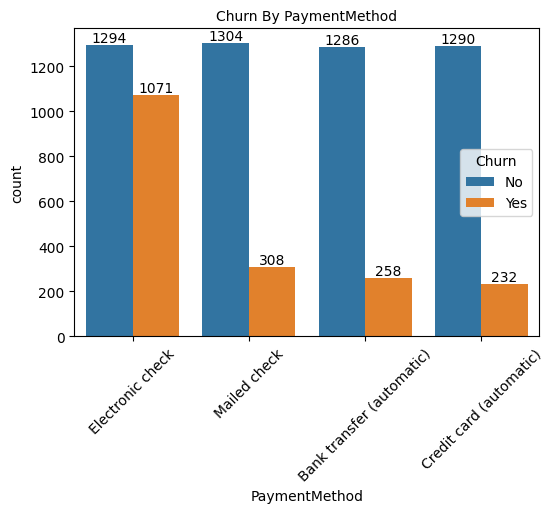

In [80]:
plt.figure(figsize=(6,4))
ax =sns.countplot(x = "PaymentMethod", data = df ,hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn By PaymentMethod",fontsize = 10)
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method